
## Aktueller Stand 19.06.2020

- B-Splines according to "[A Practical Guide to Splines](https://www.springer.com/de/book/9780387953663)" from de Boor (1978) 
- P-Splines according to "[Flexible Smoothing with B-PSplines and Penalties](links.jstor.org/sici?sici=0883-4237%28199605%2911%3A2%3C89%3AFSWAP%3E2.0.CO%3B2-Z)" from Paul Eilers and Brian Marx (1996)
- Monotonicity constraints according to "[Monotonicity-constraint Regression](http://benjaminhofner.de/downloads/2012/talks/BiometrischesKolloquium_Hofner.pdf)" from Benjamin Hofner (2012)



In [8]:
import numpy as np
from numpy.linalg import lstsq
import plotly.graph_objects as go
import plotly.express as px

from ClassBSplines import BSpline

### B-Splines

In [41]:
# create data
n = 1000
x = np.linspace(0,1,n)
y = np.sin(2*np.pi*x)

# create BSpline-basis
B = BSpline()
B.b_spline_basis(x_basis=x, k=50)

# fit basis
fit = lstsq(a=B.basis, b=y, rcond=None)
pred = B.basis @ fit[0].ravel()


Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>


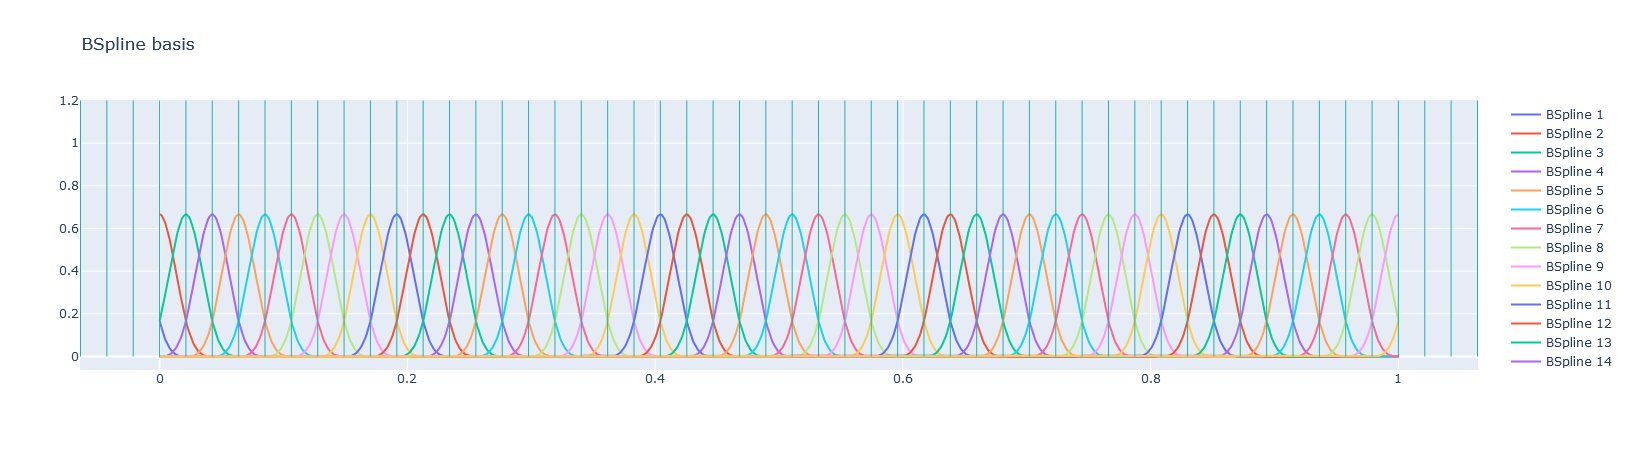

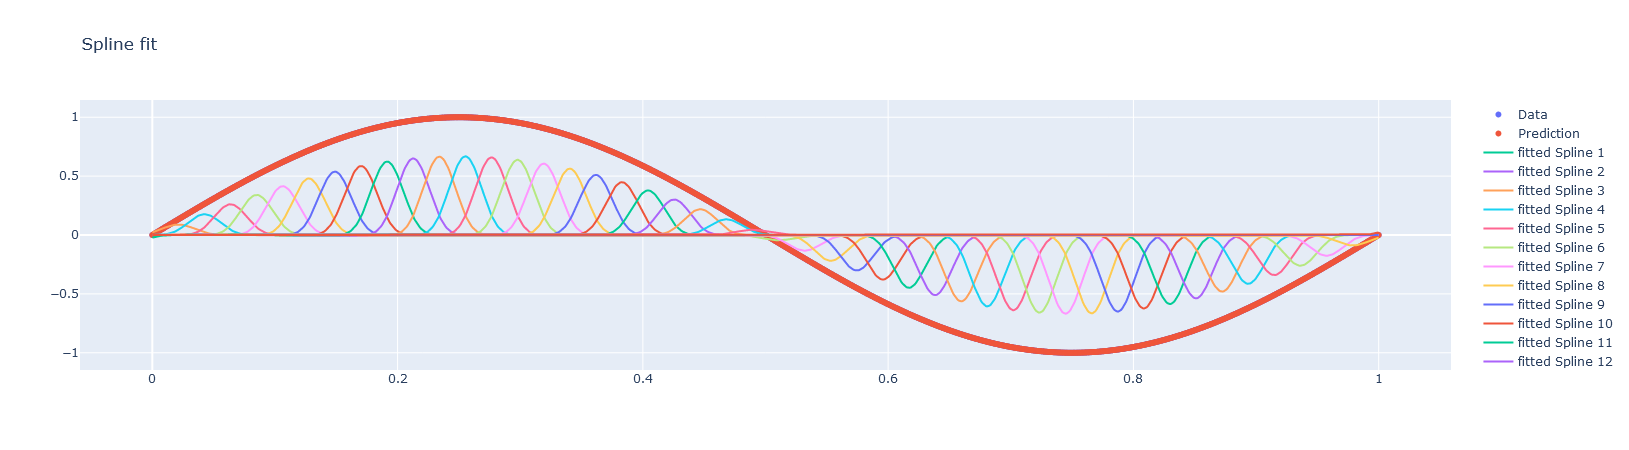

In [29]:
# plot
fig = B.plot_basis(title="BSpline basis")

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=x, y=y, name="Data", mode="markers"))
fig1.add_trace(go.Scatter(x=x, y=pred, name="Prediction", mode="markers"))

for i in range(B.basis.shape[1]):
    fig1.add_trace(go.Scatter(x=x, y=B.basis[:,i] * fit[0][i], name=f"fitted Spline {i+1}", mode="lines"))
    
fig1.update_layout(title="Spline fit")
fig1.show()


### P-Splines

Type x_data:  <class 'numpy.ndarray'>
Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>
Mean squared error on data for unconstrained LS fit: 0.0084
Create basis with penalty and weight
Least squares fit iteration  1
Mean squared error on data for unconstrained LS fit: 0.0084
Iteration converged!
Mean squared error on the data: 0.0084


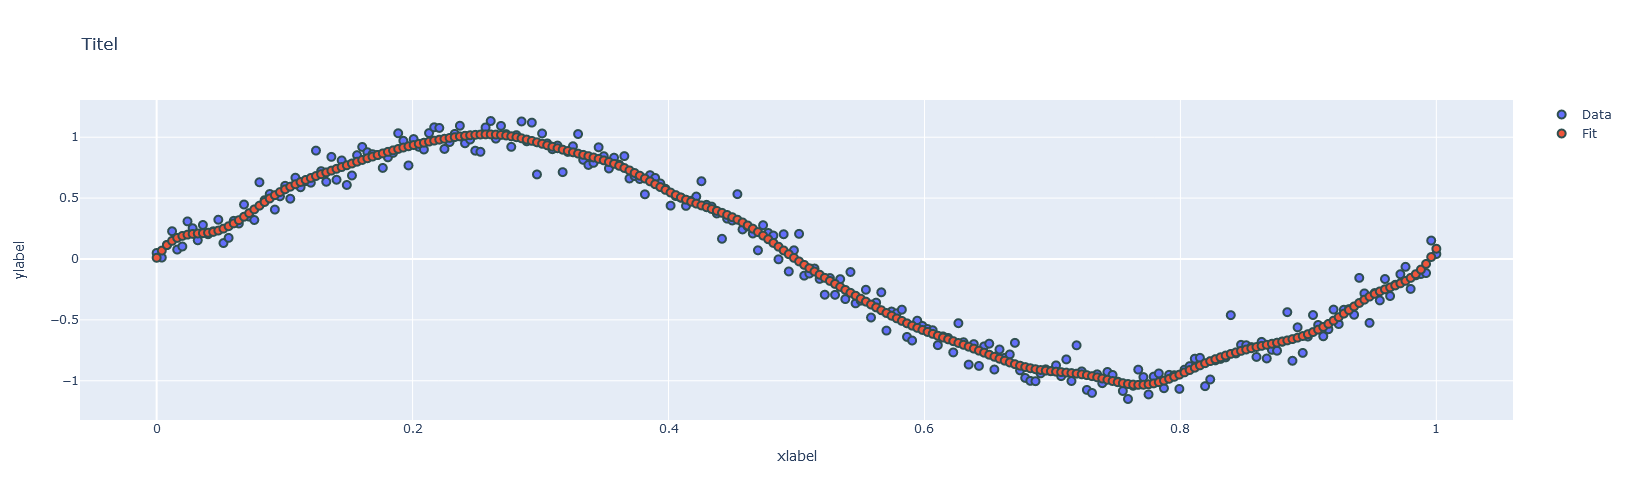

Type x_data:  <class 'numpy.ndarray'>
Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>
Mean squared error on data for unconstrained LS fit: 0.0084
Create basis with penalty and weight
Least squares fit iteration  1
Mean squared error on data for unconstrained LS fit: 0.0084
Iteration converged!
Mean squared error on the data: 0.0088


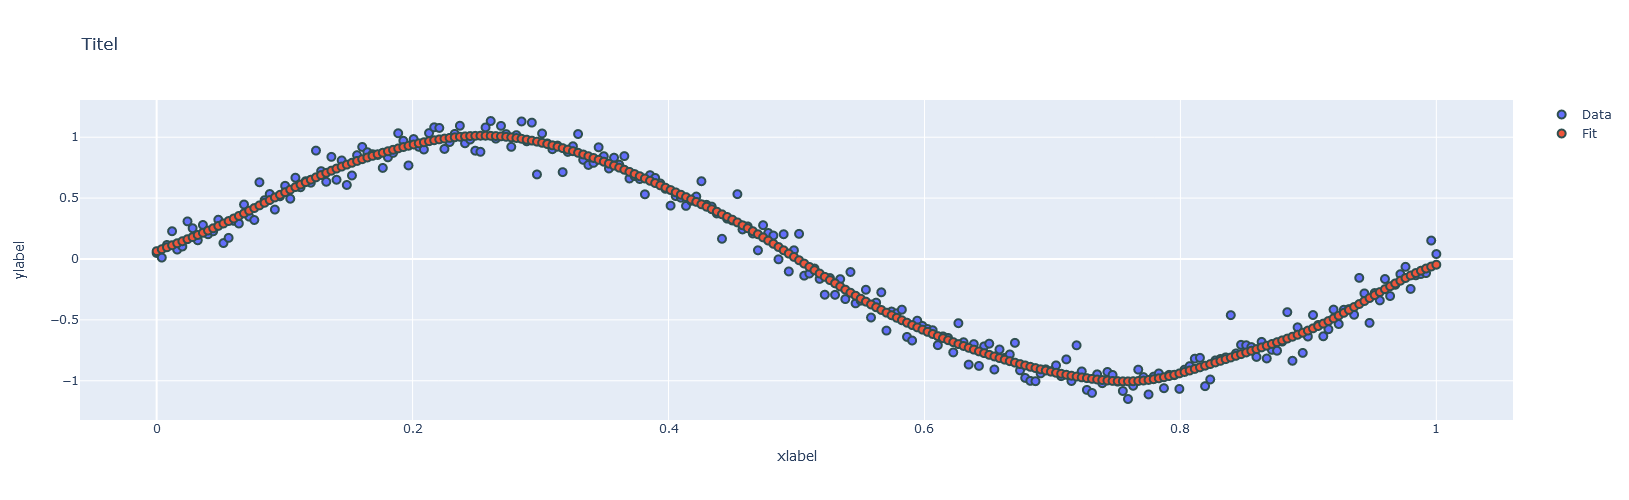

In [42]:
from Model_Notebook import Model

np.random.seed(42)
# create data
n = 250
x = np.linspace(0,1,n)
y = np.sin(2*np.pi*x) + 0.1*np.random.randn(n)


# B-Spline fit
m = (("s(1)", "smooth", 25, (0, 0)),)
M = Model(m)
fit = M.fit(X=x.reshape((n,-1)), y=y)

# P-Spline fit
m = (("s(1)", "smooth", 25, (0.5, 0)),)
M = Model(m)
fit = M.fit(X=x.reshape((n,-1)), y=y)



### Monotonicit constraint P-Splines

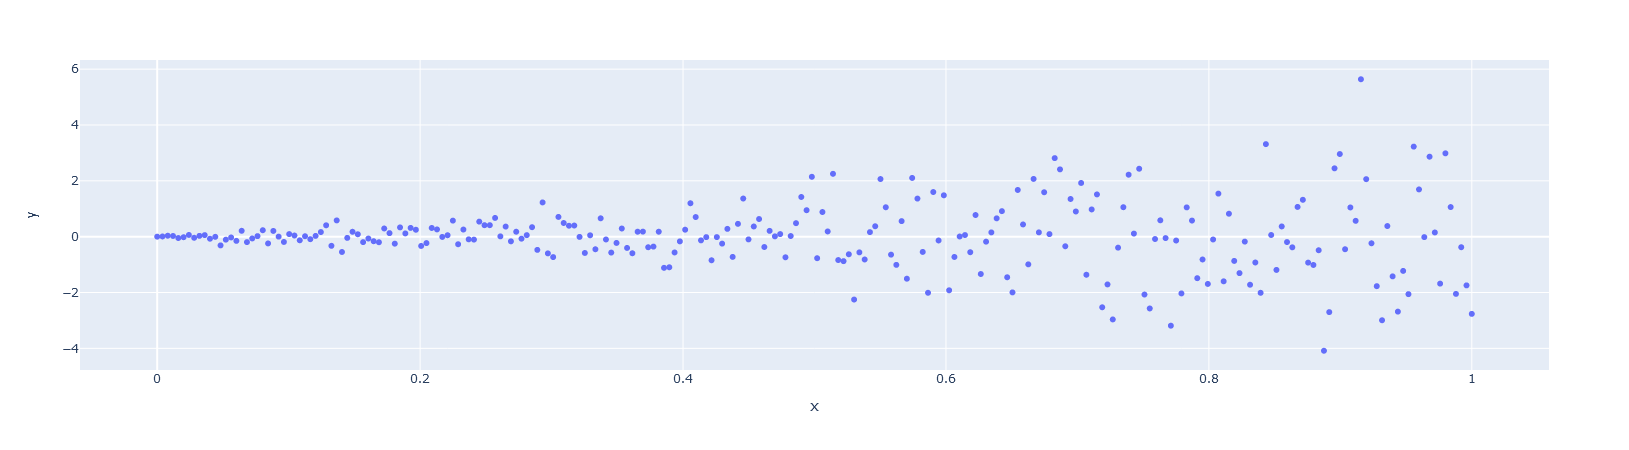

In [43]:
np.random.seed(42)
# create data
n = 250
x = np.linspace(0,1,n)
y = np.sin(2*np.pi*x) + 0.1*np.random.randn(n)

s = np.random.randn(n) * np.linspace(0,2,n)
px.scatter(x=x, y=s)


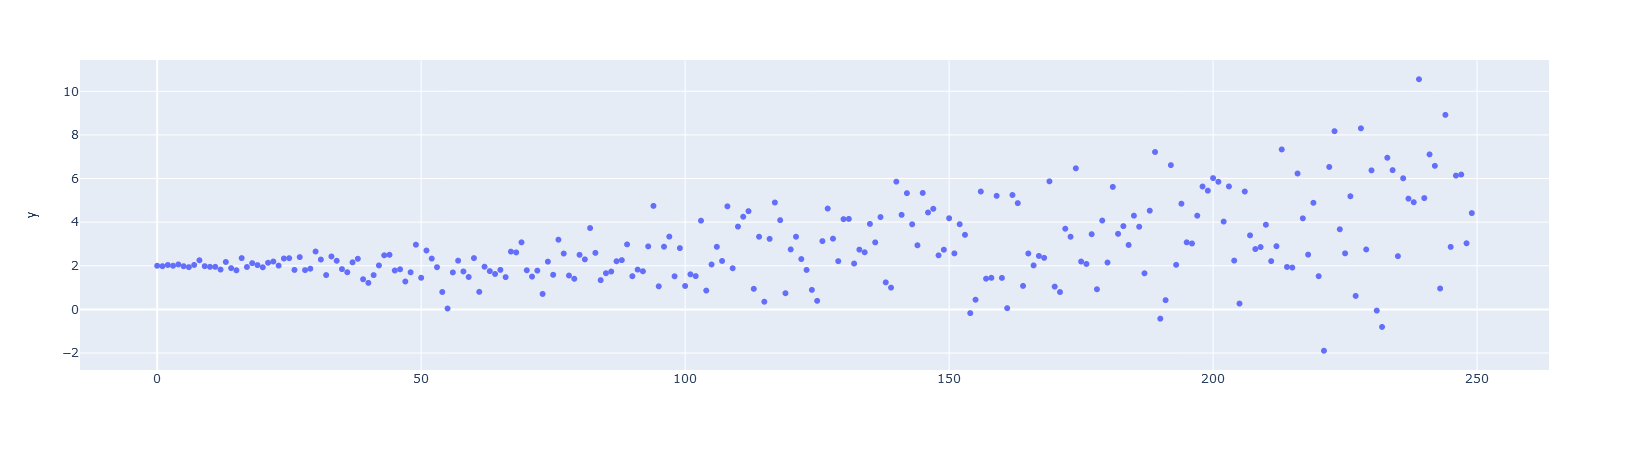

In [55]:
n = 250
x = np.linspace(0,1,n)


px.scatter(x, y=y+noise)

Type x_data:  <class 'numpy.ndarray'>
Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>
Mean squared error on data for unconstrained LS fit: 0.3832
Create basis with penalty and weight
Least squares fit iteration  1
Mean squared error on data for unconstrained LS fit: 0.3832
Iteration converged!
Mean squared error on the data: 0.4701


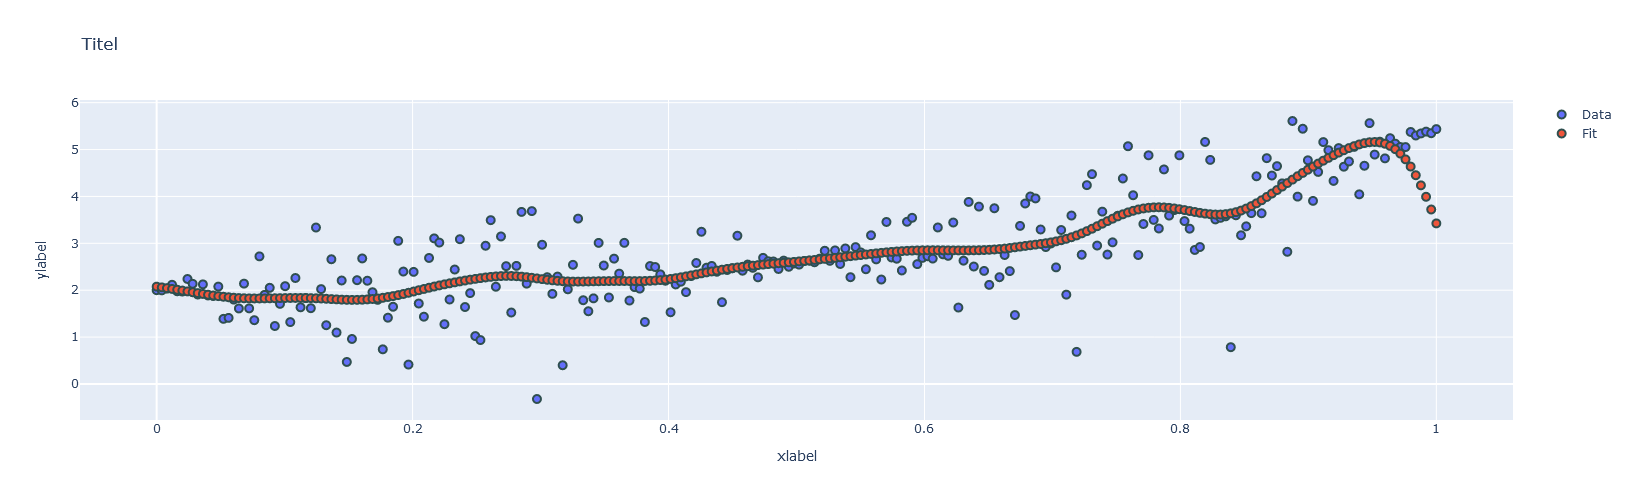

Type x_data:  <class 'numpy.ndarray'>
Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>
Mean squared error on data for unconstrained LS fit: 0.3832
Create basis with penalty and weight
Least squares fit iteration  1
Mean squared error on data for unconstrained LS fit: 0.3832
Iteration converged!
Mean squared error on the data: 0.5886


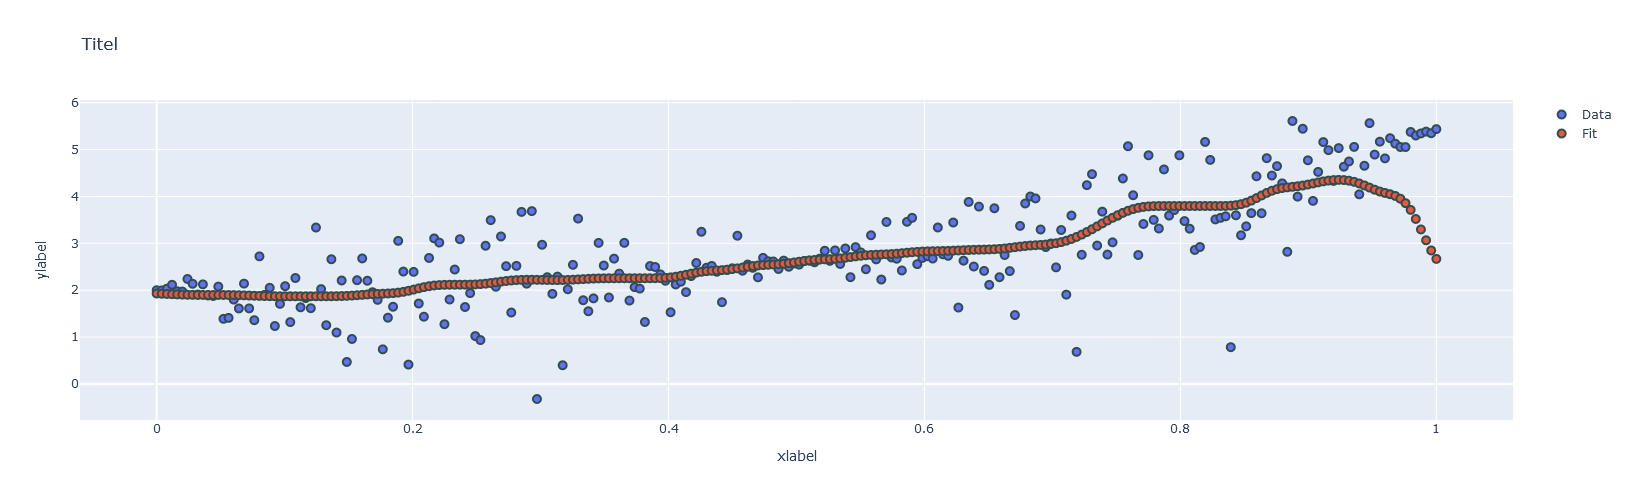

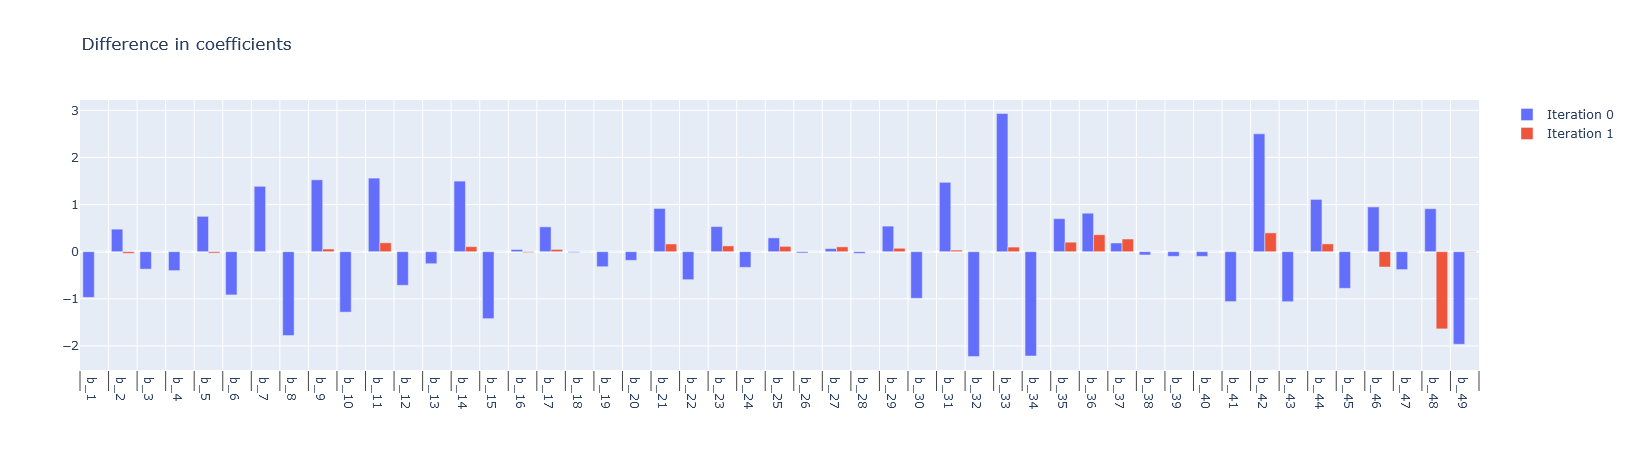

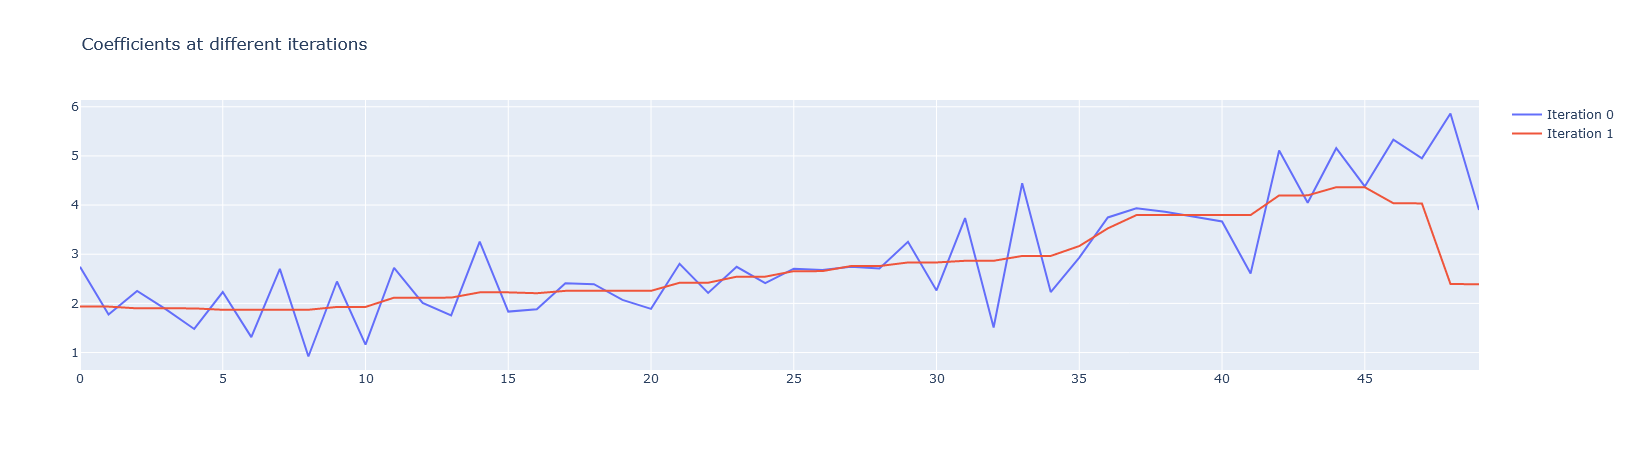

In [84]:
from Model_Notebook import check_constraint_full_model, line_chart_of_coefficient_dataframe, bar_chart_of_coefficient_difference_dataframe

np.random.seed(42)
# create data
n = 250
x = np.linspace(0,1,n)
y = 2*np.exp(x**2)
noise = np.random.randn(n) * np.sin(2*np.pi*x)
y = y + noise

# B-Spline fit
m = (("s(1)", "smooth", 25, (0, 0)),)
M = Model(m)
#fit = M.fit(X=x.reshape((n,-1)), y=y)

# P-Spline fit
m1 = (("s(1)", "smooth", 50, (5, 0)),)
M1 = Model(m1)
fit1 = M1.fit(X=x.reshape((n,-1)), y=y)

# M-Spline fit
m2 = (("s(1)", "inc", 50, (5, 5000)),)
M2 = Model(m2)
fit2 = M2.fit(X=x.reshape((n,-1)), y=y)

bar_chart_of_coefficient_difference_dataframe(M2.df_beta)
line_chart_of_coefficient_dataframe(M2.df_beta)


In [77]:
M.coef_

array([1.93447123, 1.93443073, 1.89904002, 1.89879596, 1.89857846,
       1.86974598, 1.86970094, 1.87046268, 1.8704554 , 1.92735392,
       1.92784212, 2.11660805, 2.11707795, 2.11745139, 2.2243541 ,
       2.22433257, 2.20674322, 2.25473062, 2.25487646, 2.25493082,
       2.25528523, 2.41948479, 2.42004512, 2.54303702, 2.54348792,
       2.65603439, 2.65646987, 2.75926111, 2.75964306, 2.83234992,
       2.83252195, 2.8665672 , 2.86676011, 2.96471941, 2.96497033,
       3.16636283, 3.5265622 , 3.79583121, 3.79614223, 3.79612154,
       3.79615852, 3.79693955, 4.19615522, 4.19736945, 4.36293649,
       4.36268191, 4.03745101, 4.03385081, 2.39585152, 2.38723954])

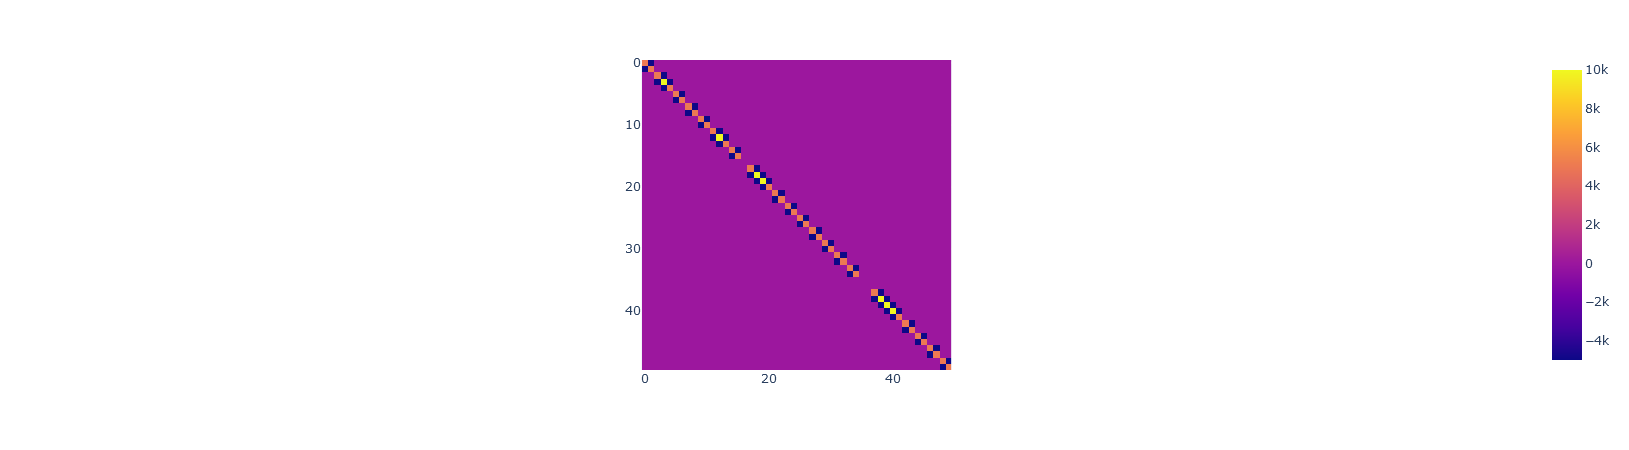

In [79]:
px.imshow(M.penalty_block_matrix)

In [80]:
from Model_Notebook import check_constraint_full_model
check_constraint_full_model(M)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0])